# All sorts of Sorts

## What is this?
<font color=green>
    <p>
        This is a notebook providing implementations, analyses, and animations of popular sorting algorithms. All of the sorting algorithms run on a shared array (each get their own copy) of randomly generated integers between 0 and 100.
    </p>
</font>

<p>
    Algorithms include:
</p>
<ul>
    <li><b>Bubble sort</b></li>
    <li><b>Insertion sort</b></li>
    <li><b>Selection sort</b></li>
</ul>

### Glossary
<p>
    <b>Time complexity:</b> the computational complexity describing the time it takes to run an algorithm.
</p>
<p>
    <b>Space complexity:</b> the computational complexity describing the amount of working memory it takes to run an algorithm.
</p>
<p>
    <b>Stable:</b>  a stable sorting algorithm is one where the relative order of array elements of equal value is preserved. Unstable sorting algorithms, on the other hand, don't.
</p>
<p>
    <b>In-place:</b> an in-place algorithm is one that does not need extra space and produces an output in the same memory that contains the input data by manipulating the data 'in-place'.
</p>

In [113]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import copy

In [117]:
%matplotlib notebook
arr = np.random.randint(low=0, high=100, size=50)

In [118]:
def animate_sort(sort_fn) -> FuncAnimation:
    '''
    Wrapper function for animating the sorting functions in this notebook.
    Plots a bar chart of the array mentioned above over the iterations of each sorting function.
    
    Args:
        sort_fn: the sorting function to call on the array
        
    Returns:
        FuncAnim: for animation
    '''
    fig=plt.figure()

    x = range(len(arr))
    frames = sort_fn(copy.deepcopy(arr))
    n = len(frames) # Number of frames
    barcollection = plt.bar(x, frames[0])

    def animate(i):
        y = frames[i]
        for i, b in enumerate(barcollection):
            b.set_height(y[i])

    anim = FuncAnimation(fig, animate, repeat=False, blit=True, frames=n, interval=20)
    return anim

In [119]:
def bubble_sort(arr: list) -> list:
    '''
    The poster child for inefficient but feasible sorting.
    Bubble sort iterates through the items in the list and the items bubble up (or down) to their respective positions.
    This is done by repeatedly swapping an element to its position.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list of frames for animation use
    
    Analysis:
        Time: 
            Worst: O(n^2)
            Best: O(n) [array is already sorted]
            Average: O(n^2)
        Space: O(1)
        Stable: Yes
        In-place: Yes
    '''
    frames = []
    n = len(arr)
    for i in range(n):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                frames.append(copy.deepcopy(arr))
    return frames

In [123]:
def insertion_sort(arr: list) -> list:
    '''
    This sorting algorithm builds the sorted array one item at a time. It looks at
    each element and swaps it into its correct place in the sorted subarray.
    It is inefficient for big lists but efficient for small ones. It is also efficient
    for data sets that are already nearly sorted in which the algorithm runs at a 
    time complexity of O(kn) where each element in the input is no more than k places away from
    its sorted position.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list of frames for animation use
            
    Analysis:
        Time: 
            Worst: O(n^2) [array is sorted in reverse order]
            Best: O(n) [array is already sorted]
            Average: O(n^2)
        Space: O(1)
        Stable: Yes
        In-place: Yes
    '''
    frames = []
    n = len(arr)
    for i in range(1,n):
        cand = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > cand:
            arr[j+1] = arr[j]
            j -= 1
            frames.append(copy.deepcopy(arr))
        arr[j+1] = cand
    return frames

In [125]:
def selection_sort(arr: list) -> list:
    '''
    This sorting algorithm probably dates back to the dawn of sentience 
    where our predecessors sorted their favorite rocks by size.
    Selection sort finds the largest (or smallest) value in the subarray and places it at the end (or front) of the subarray.
    Generally performs worse than insertion sort.
    
    Function description:
        Args:
            arr: the array to sort

        Returns:
            A list of frames for animation use
            
    Analysis:
        Time: 
            Worst, Best, Average: O(n^2)
        Space: O(1)
        Stable: Depends on implementation. In this one, yes.
        In-place: Yes
    '''
    frames = []
    n = len(arr)
    for i in range(n-1, -1, -1):
        swap_index = 0
        for j in range(i):
            if arr[j] > arr[swap_index]:
                swap_index = j
        
        arr[i], arr[swap_index] = arr[swap_index], arr[i]
        frames.append(copy.deepcopy(arr))
    
    return frames

<IPython.core.display.Javascript object>


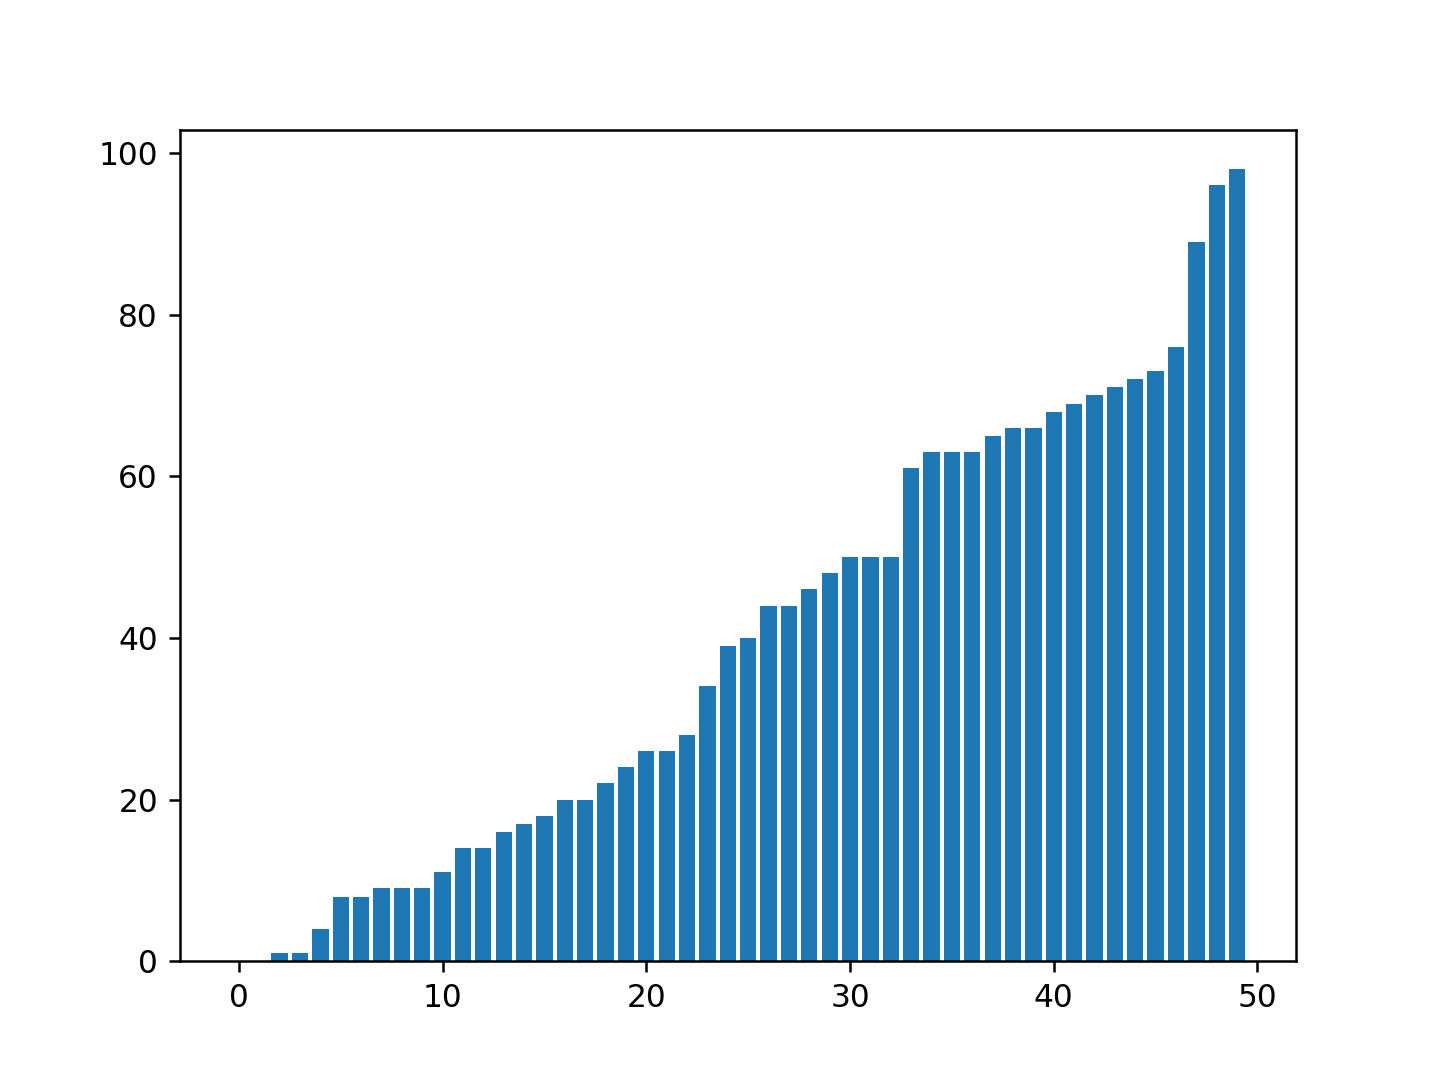

In [128]:
animate_sort(insertion_sort)